In [1]:
import os
import csv
import shutil
import pandas as pd
from multiprocessing import Process

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wget


%load_ext autoreload
%autoreload 2

In [2]:
OUTPUT_PATH = '../data/raw/'

In [3]:
# Time Series Reports:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
confirmed_global_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_global_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

urls = [confirmed_url, deaths_url, recovered_url, confirmed_global_url, deaths_global_url]
filenames = []

for url in urls:
    filename = wget.download(url, out=OUTPUT_PATH)
    filenames.append(url.split('/')[-1])

In [4]:
filenames

['time_series_19-covid-Confirmed.csv',
 'time_series_19-covid-Deaths.csv',
 'time_series_19-covid-Recovered.csv',
 'time_series_covid19_confirmed_global.csv',
 'time_series_covid19_deaths_global.csv']

In [5]:
confirmed_df = pd.read_csv(OUTPUT_PATH+'time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv(OUTPUT_PATH+'time_series_19-covid-Deaths.csv')
recovered_df = pd.read_csv(OUTPUT_PATH+'time_series_19-covid-Recovered.csv')
confirmed_global_df = pd.read_csv(OUTPUT_PATH+'time_series_covid19_confirmed_global.csv')
deaths_global_df = pd.read_csv(OUTPUT_PATH+'time_series_covid19_deaths_global.csv')

dataframes = [confirmed_df, deaths_df, recovered_df, confirmed_global_df, deaths_global_df]

for df in dataframes:
    display(df.shape)
    display(df.head())

(501, 66)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


(501, 66)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,22,22,27,29,29,29,33,35,40,40.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,2,2,2,3,4,10,10.0


(501, 66)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,35,35,35,41,42,42,42,42,44,44.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,144,144,144,150,191,232,235,235.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,105,105,109,114,114,114,124,140,144,144.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,35,42,42,49,60,75,87,114,139,139.0


(238, 66)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,11,16,21,22,22,22,24,24,40,40
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,38,42,51,55,59,64,70,76,89,104
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,37,48,54,60,74,87,90,139,201,230
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,2,39,39,53,75,88,113,133
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3


(238, 66)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,1,1,2,2,2,2,2,4
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3,4,4,4,7,9,11,15,17,17
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### What is the difference betwen the Global Schema and the prior Schema?

In [6]:
print(confirmed_df.shape)
print(confirmed_global_df.shape)

display(confirmed_df.head())
display(confirmed_global_df.head())

(501, 66)
(238, 66)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,11,16,21,22,22,22,24,24,40,40
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,38,42,51,55,59,64,70,76,89,104
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,37,48,54,60,74,87,90,139,201,230
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,2,39,39,53,75,88,113,133
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3


In [7]:
display(confirmed_df['Country/Region'].nunique())
display(confirmed_global_df['Country/Region'].nunique())

#Countries included in the confirmed dataset that are not included in the new schema
display(set(confirmed_df['Country/Region'].unique().tolist()) - set(confirmed_global_df['Country/Region'].unique().tolist()))

display(confirmed_df['Province/State'].nunique())
display(confirmed_global_df['Province/State'].nunique())

# Provinces in the Global dataset not included in the old schema - all are in the US
display(set(confirmed_df['Province/State'].unique().tolist()) - set(confirmed_global_df['Province/State'].unique().tolist()))

183

168

{'Bahamas, The',
 'Cape Verde',
 'East Timor',
 'French Guiana',
 'Gambia, The',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Guernsey',
 'Jersey',
 'Kosovo',
 'Martinique',
 'Mayotte',
 'Puerto Rico',
 'Republic of the Congo',
 'Reunion',
 'The Bahamas',
 'The Gambia'}

325

73

{'Adams, IN',
 'Alabama',
 'Alachua, FL',
 'Alameda County, CA',
 'Alaska',
 'Anoka, MN',
 'Arapahoe, CO',
 'Arizona',
 'Arkansas',
 'Arlington, VA',
 'Beadle, SD',
 'Bennington County, VT',
 'Bergen County, NJ',
 'Berkshire County, MA',
 'Bernalillo, NM',
 'Bon Homme, SD',
 'Boone, IN',
 'Broward County, FL',
 'Bucks, PA',
 'Burlington, NJ',
 'Calaveras, CA',
 'California',
 'Camden, NC',
 'Camden, NJ',
 'Carver County, MN',
 'Charles Mix, SD',
 'Charleston County, SC',
 'Charlotte County, FL',
 'Charlton, GA',
 'Chatham County, NC',
 'Cherokee County, GA',
 'Clark County, NV',
 'Clark County, WA',
 'Cobb County, GA',
 'Collier, FL',
 'Collin County, TX',
 'Colorado',
 'Connecticut',
 'Contra Costa County, CA',
 'Cook County, IL',
 'Cuyahoga, OH',
 'Dallas, TX',
 'Dane, WI',
 'Davidson County, TN',
 'Davis County, UT',
 'Davison, SD',
 'DeKalb, GA',
 'Delaware',
 'Delaware County, PA',
 'Denmark',
 'Denver County, CO',
 'Deschutes, OR',
 'District of Columbia',
 'Douglas County, CO',


Until we have recovery rates in the new schema, we will continue using the older schema.

## EDA

In [8]:
dates = deaths_df.columns.tolist()[4:]

confirmed_df_long = confirmed_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')
deaths_df_long = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')
recovered_df_long = recovered_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')

full_table = pd.concat([confirmed_df_long, deaths_df_long['Deaths'], recovered_df_long['Recovered']], 
                       axis=1, sort=False)

full_table['Date'] = pd.to_datetime(full_table['Date'])
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


### Create Country-Level Dataset

In [9]:
#full_table[full_table['Country/Region'] == 'France']['Province/State'].unique().tolist()

In [10]:
full_table[(full_table['Country/Region'] == full_table['Province/State'])]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
157,France,France,46.2276,2.2137,2020-01-22,0.0,0.0,0.0
170,Denmark,Denmark,56.2639,9.5018,2020-01-22,0.0,0.0,0.0
403,United Kingdom,United Kingdom,55.3781,-3.4360,2020-01-22,0.0,0.0,0.0
440,Netherlands,Netherlands,52.1326,5.2913,2020-01-22,0.0,0.0,0.0
492,US,US,37.0902,-95.7129,2020-01-22,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
30718,France,France,46.2276,2.2137,2020-03-23,16018.0,674.0,2200.0
30731,Denmark,Denmark,56.2639,9.5018,2020-03-23,1395.0,13.0,1.0
30964,United Kingdom,United Kingdom,55.3781,-3.4360,2020-03-23,5683.0,281.0,65.0
31001,Netherlands,Netherlands,52.1326,5.2913,2020-03-23,4204.0,179.0,2.0


In [11]:
#Significant overcounting in Countries where data is presented at the State level
display(full_table['Country/Region'].value_counts())


US                     15438
China                   2046
Canada                   744
Australia                558
France                   558
                       ...  
Reunion                   62
Chile                     62
Guinea                    62
Trinidad and Tobago       62
Mayotte                   62
Name: Country/Region, Length: 183, dtype: int64

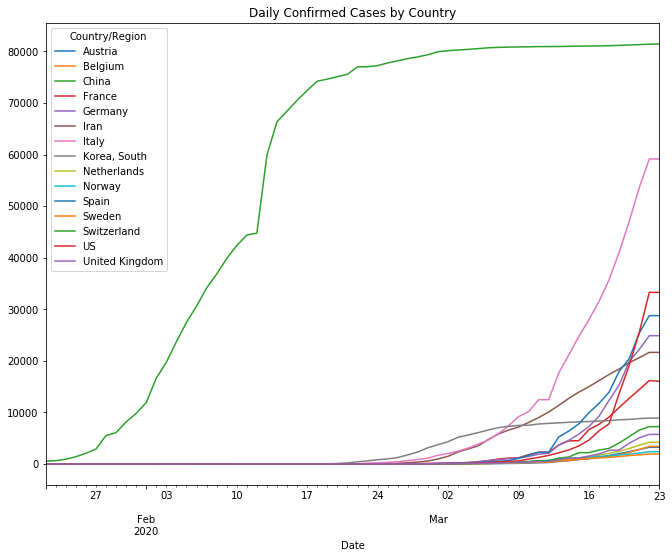

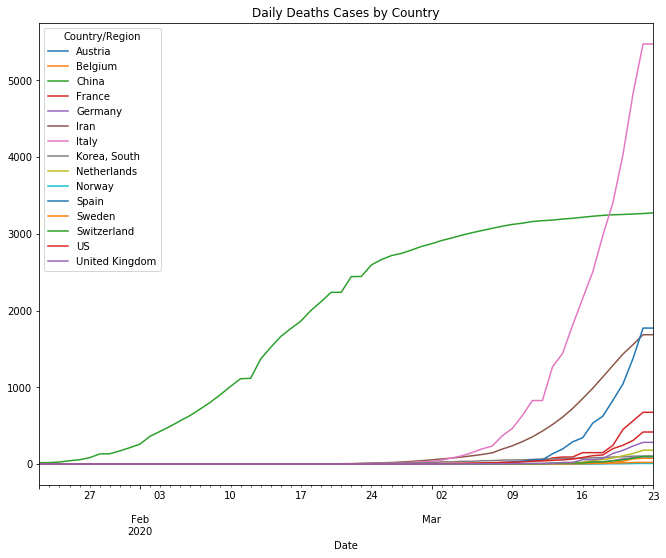

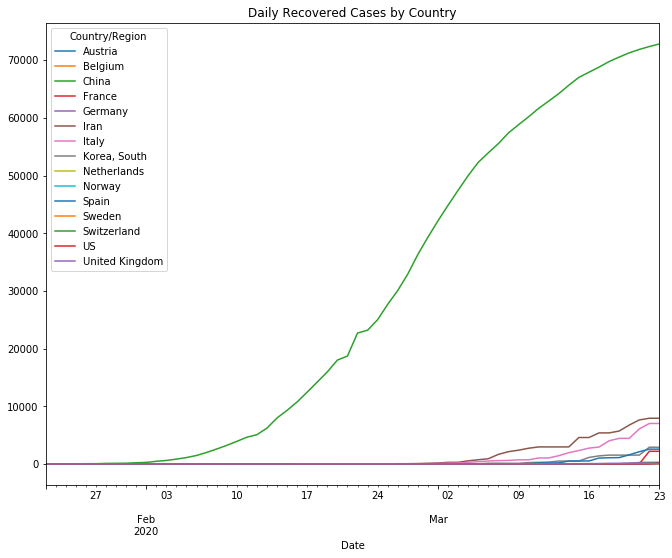

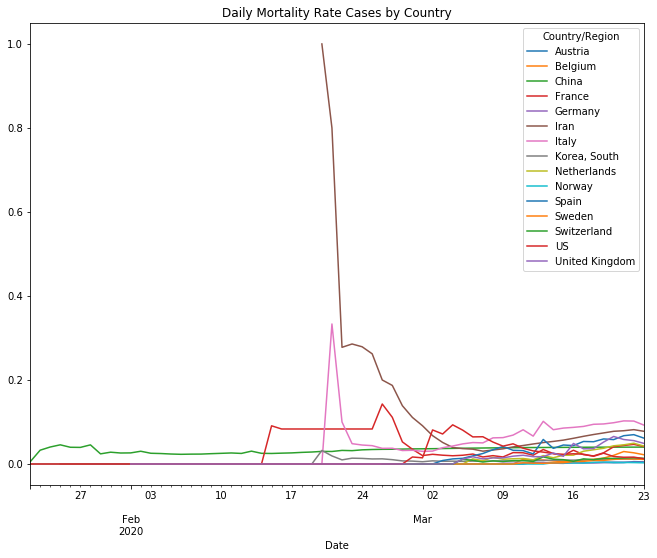

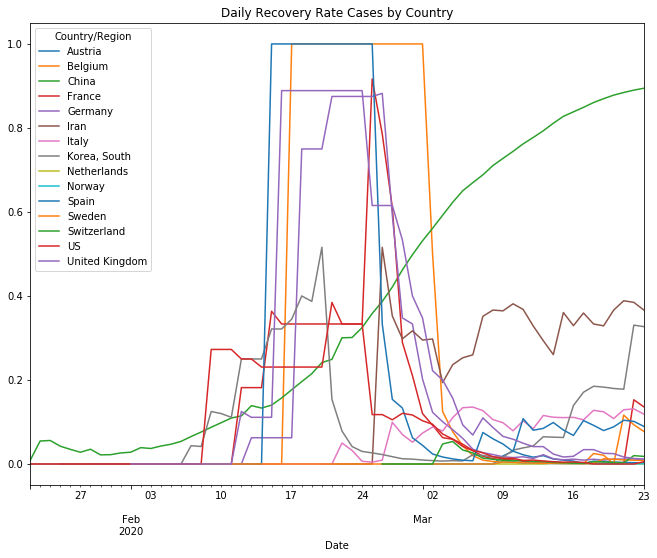

In [12]:
# Countries by the most number of confirmed cases
countries_include = full_table.groupby('Country/Region').Confirmed.max().sort_values(ascending=False)[:15].index.tolist()
country_filter = full_table[full_table['Country/Region'].isin(countries_include)]

#Maybe unnecessary but we would still like to aggregate at the Country-level
country_plot = country_filter.groupby(['Country/Region', 'Date']).agg({'Lat':np.mean, 'Long': np.mean, 'Confirmed':sum, 'Deaths':sum, 'Recovered':sum})

#Calculate mortality rate and recovery rate
country_plot['Confirmed_1'] = country_plot['Confirmed'].shift(1)
country_plot['Mortality Rate'] = country_plot.Deaths/country_plot.Confirmed_1
country_plot['Recovery Rate'] = country_plot.Recovered/country_plot.Confirmed_1


for kpi in ['Confirmed', 'Deaths', 'Recovered', 'Mortality Rate', 'Recovery Rate']:
    country_plot.unstack(level=0)[kpi].plot(figsize=(11,8.5), title = f'Daily {kpi} Cases by Country')


We see that mortality rate and specifically recovery rates are impossible to determine given the extent to which prevelance of testing and the selection of cases which are tested significantly impacts our measuremnt of these rates.

Particularly, if we look at Iran, we see that early cases were tested most likely because they were very serious leading to higher reported mortality rates than we observe in the longer term.

In [13]:
country_plot.loc['Iran'].tail(n=40)

,Lat,Long,Confirmed,Deaths,Recovered,Confirmed_1,Mortality Rate,Recovery Rate
Date,,,,,,,,
2020-02-13,32.0,53.0,0.0,0.0,0.0,0.0,NaN,NaN
2020-02-14,32.0,53.0,0.0,0.0,0.0,0.0,NaN,NaN
2020-02-15,32.0,53.0,0.0,0.0,0.0,0.0,NaN,NaN
2020-02-16,32.0,53.0,0.0,0.0,0.0,0.0,NaN,NaN
2020-02-17,32.0,53.0,0.0,0.0,0.0,0.0,NaN,NaN
2020-02-18,32.0,53.0,0.0,0.0,0.0,0.0,NaN,NaN
2020-02-19,32.0,53.0,2.0,2.0,0.0,0.0,inf,NaN
2020-02-20,32.0,53.0,5.0,2.0,0.0,2.0,1.000000,0.000000
2020-02-21,32.0,53.0,18.0,4.0,0.0,5.0,0.800000,0.000000


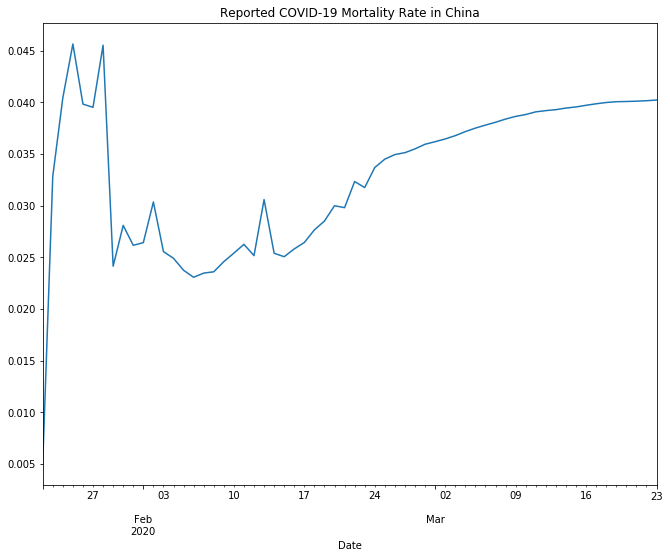

In [14]:
country_plot.loc['China']['Mortality Rate'].plot(figsize=(11,8.5), title = 'Reported COVID-19 Mortality Rate in China')

/Users/clairesaint-donat/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


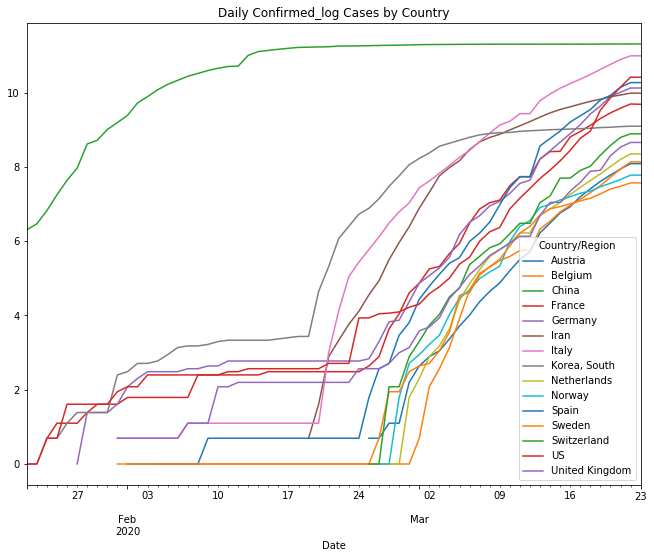

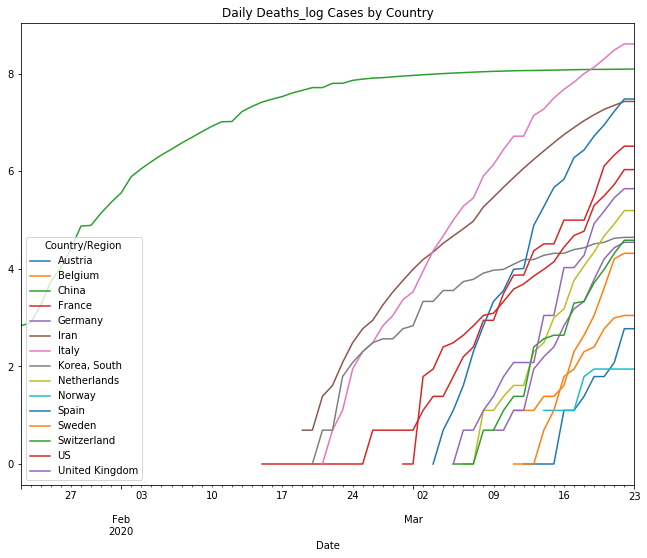

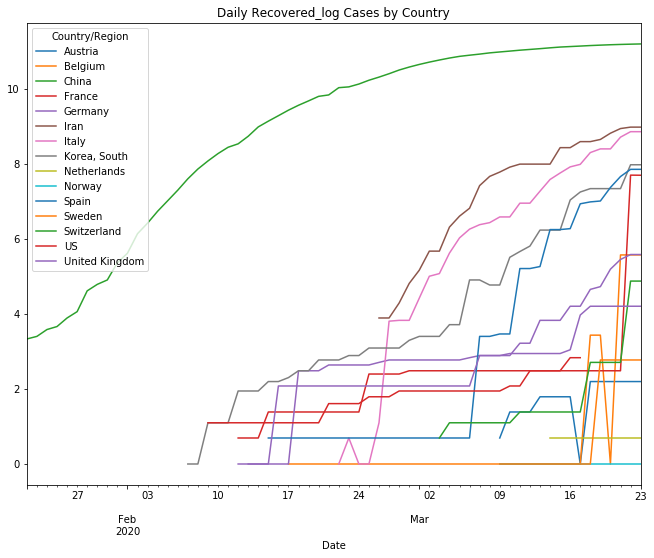

In [15]:
# Taking Logarithms to help emphasize the rate of change of these KPIs

country_plot['Confirmed_log'] = np.log(country_plot['Confirmed'])
country_plot['Deaths_log'] = np.log(country_plot['Deaths'])
country_plot['Recovered_log'] = np.log(country_plot['Recovered'])

for kpi in ['Confirmed_log', 'Deaths_log', 'Recovered_log']:
    country_plot.unstack(level=0)[kpi].plot(figsize=(11,8.5), title = f'Daily {kpi} Cases by Country')


### Days Since 100th Case

In [23]:
hundred_cases = country_plot[country_plot.Confirmed >= 100]
day_counts = hundred_cases.reset_index().set_index('Country/Region').Date.rank()
#hundred_cases['Days'] = day_counts
day_counts

Country/Region
Austria           136.0
Austria           151.0
Austria           166.0
Austria           181.0
Austria           196.0
                  ...  
United Kingdom    301.0
United Kingdom    316.0
United Kingdom    331.0
United Kingdom    346.0
United Kingdom    361.0
Name: Date, Length: 368, dtype: float64